<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/333_Intro_to_YOLO_V8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/JQ_RRcHLKFc

# **An introduction to YOLO v8 <p>**

This notebook walks you through a few lines of code to help explore YOLO v8 for object detection and instance segmentation using pre-trained weights. More information about YOLO v8 can be found here.

https://docs.ultralytics.com/models/yolov8/#key-features


In [116]:
# pip install ultralytics opencv-python numpy matplotlib

In [117]:
import numpy as np
a = np.array([[1., 0., 0.],
 [0., 1., 0.],
 [0., 0., 1.]])
print(a@a)

[[          1           0           0]
 [          0           1           0]
 [          0           0           1]]


In [118]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
a = np.array([[1., 0., 0.],
 [0., 1., 0.],
 [0., 0., 1.]])
print(a@a)

[[          1           0           0]
 [          0           1           0]
 [          0           0           1]]


Load the model. Here, we will load both detection and instance models to see the difference in the type of results from these models.

In [150]:
#Instance model
inst_model = YOLO('yolo11l-seg.pt')

Run inference on an input image using both models.

In [200]:
# Perform object detection on an image using the model
img = './test_img/IMG_5497.JPG'
instance_results = inst_model.predict(img)



image 1/1 c:\Users\76135\Desktop\ADSYS-Cardboard-AI-Detection\test_img\IMG_5497.JPG: 480x640 1 bundle, 229.5ms
Speed: 31.6ms preprocess, 229.5ms inference, 28.4ms postprocess per image at shape (1, 3, 480, 640)


Plot the results and compare. Notice how the object detection model gives bounding boxes only whereas the instance segmentation results give both the bounding box and corresponding object pixels.

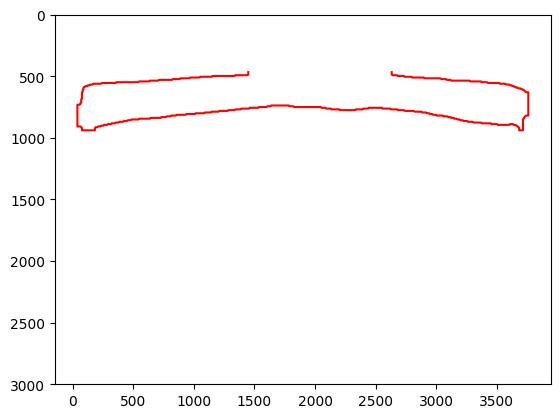

In [201]:
coord = instance_results[0].masks.xy
plt.ylim(3000, 0)
plt.plot(coord[0][:, 0], coord[0][:, 1], 'r-')

In [202]:
instance_results[0].boxes.xyxy[0].numpy()

array([     27.268,      458.61,      3732.2,      912.86], dtype=float32)

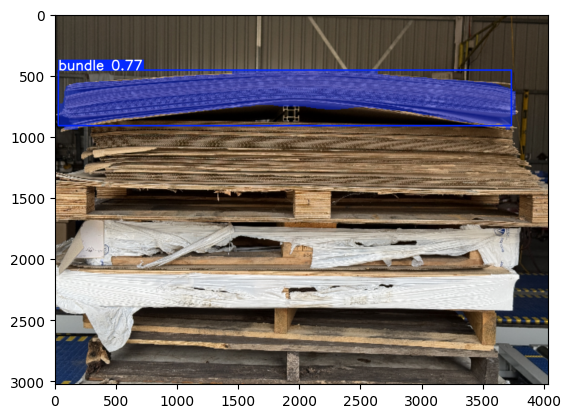

In [203]:
import cv2
img_rgb = cv2.cvtColor(instance_results[0].plot(), cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

/9j/4AAQSk


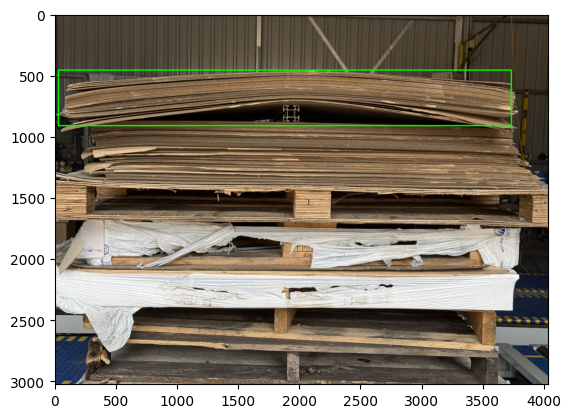

In [204]:
import cv2
import base64
import matplotlib.pyplot as plt


# Load as OpenCV image
img = cv2.imread(img)

# Get bounding box
x1, y1, x2, y2 = instance_results[0].boxes.xyxy[0].numpy().astype(int)

# Draw rectangle
cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 10)

# Encode to base64
_, buffer = cv2.imencode('.jpg', img)
img_base64 = base64.b64encode(buffer).decode('utf-8')
print(img_base64[:10])

# Show with matplotlib (OpenCV loads in BGR, convert to RGB)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()


In [211]:
import requests
import base64
import json


url = "http://localhost:11434/api/generate"

payload = {
    "model": "qwen2.5vl:7b",
    "prompt": "Describe the cardboard in green bounding box, return only in JSON. \nWarp: True/ False\nOverall quality: Good(completely flat, no gap), medium(Slightly gap), bad",
    "stream": False,
    "images": [img_base64]
}

headers = {"Content-Type": "application/json"}

response = requests.post(url, headers=headers, data=json.dumps(payload))

print(response.json()['response'])


```json
{
  "warp": true,
  "overall_quality": "bad"
}
```


Decoded shape: (3024, 4032, 3) dtype: uint8


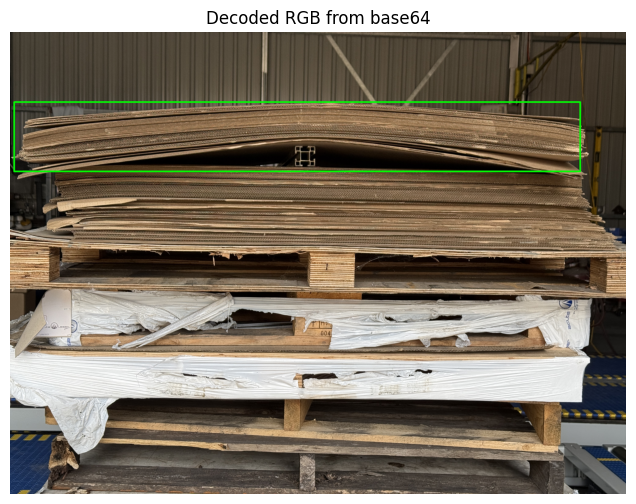

In [205]:
import base64
import re
import numpy as np
import cv2
import matplotlib.pyplot as plt

def b64_to_rgb(b64_str: str) -> np.ndarray:
    # Strip any data URL header if present
    b64_clean = re.sub(r"^data:image/[^;]+;base64,", "", b64_str)
    # Decode base64 -> bytes
    img_bytes = base64.b64decode(b64_clean)
    # Bytes -> 1D uint8 array
    img_array = np.frombuffer(img_bytes, dtype=np.uint8)
    # Decode into BGR image
    bgr = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    if bgr is None:
        raise ValueError("Failed to decode base64 image (got None from cv2.imdecode).")
    # Convert to RGB for matplotlib
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return rgb

# --- Use it ---
# Assuming your variable is `img_base64`
rgb_img = b64_to_rgb(img_base64)

print("Decoded shape:", rgb_img.shape, "dtype:", rgb_img.dtype)  # e.g. (H, W, 3) uint8

plt.figure(figsize=(8, 6))
plt.imshow(rgb_img)
plt.axis("off")
plt.title("Decoded RGB from base64")
plt.show()


In [ ]:
instance_results[0].masks.xy[0]

'''Describe the cardboard in green bounding box, return only in JSON

Warp: True/ False
Estimated Warping rate: #%
Overall quality: Good(completely flat, no gap), medium, bad'''

array([[     1624.3,      1374.4],
       [     1624.3,      1597.6],
       [     1918.9,      1597.6],
       [     1927.8,      1588.7],
       [     2249.1,      1588.7],
       [       2258,      1579.7],
       [     2338.4,      1579.7],
       [     2347.3,      1570.8],
       [     2472.2,      1570.8],
       [     2481.1,      1561.9],
       [     2588.2,      1561.9],
       [     2597.2,      1552.9],
       [     2677.5,      1552.9],
       [     2686.4,        1544],
       [     2731.1,        1544],
       [       2740,      1535.1],
       [     2811.4,      1535.1],
       [     2820.3,      1526.2],
       [     2918.5,      1526.2],
       [     2927.4,      1535.1],
       [     3284.4,      1535.1],
       [     3293.3,        1544],
       [     3391.5,        1544],
       [     3400.4,      1552.9],
       [     3480.8,      1552.9],
       [     3489.7,      1561.9],
       [     3623.6,      1561.9],
       [     3632.5,      1570.8],
       [     3712.8,

C:\Users\76135\AppData\Local\Temp\ipykernel_34876\1345020972.py:21: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  dist = np.abs(np.cross(AB, M - A)) / np.linalg.norm(AB)


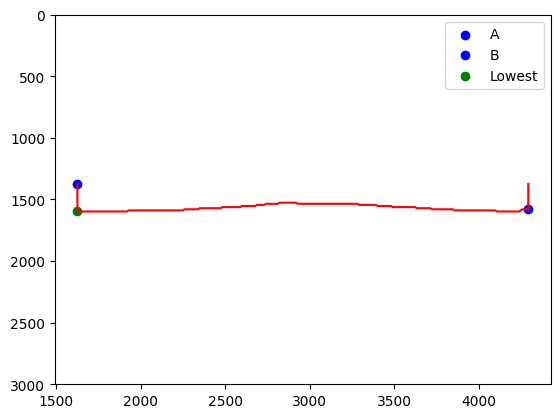

Deflection h: 111.23 mm
Chord length L: 1338.23 mm
Radius R: 2068.11 mm
Warp %: 8.31%
Status: REJECT


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 取 YOLO mask 坐标 (示例一条 mask)
coord = instance_results[0].masks.xy[0]  # shape: (N,2)
# 提取所有点
xs, ys = coord[:,0], coord[:,1]

# 找到 mask 的最左 & 最右点，作为 A,B
xmin_idx, xmax_idx = np.argmin(xs), np.argmax(xs)
A = np.array([xs[xmin_idx], ys[xmin_idx]])  # 左边界点
B = np.array([xs[xmax_idx], ys[xmax_idx]])  # 右边界点

# 找到 mask 中最低点 (pyplot 坐标系，数值最大)
lowest_idx = np.argmax(ys)
M = np.array([xs[lowest_idx], ys[lowest_idx]])

# 计算 M 到 AB 的垂直距离
AB = B - A
dist = np.abs(np.cross(AB, M - A)) / np.linalg.norm(AB)
L = np.linalg.norm(B - A)

# 半径 & 曲率
h = dist
R = (L**2) / (8*h) + h/2 if h > 0 else np.inf
kappa = 1 / R if R != np.inf else 0

# 像素转毫米
px_per_mm = 2.0
dist_mm = dist / px_per_mm
L_mm = L / px_per_mm
R_mm = R / px_per_mm
warp_pct = (dist_mm / L_mm) * 100
status = "REJECT" if warp_pct >= 2.0 else "PASS"

# 可视化
plt.ylim(3000, 0)
plt.plot(xs, ys, 'r-')
plt.scatter(*A, c='blue', label="A")
plt.scatter(*B, c='blue', label="B")
plt.scatter(*M, c='green', label="Lowest")
plt.legend()
plt.show()

print(f"Deflection h: {dist_mm:.2f} mm")
print(f"Chord length L: {L_mm:.2f} mm")
print(f"Radius R: {R_mm:.2f} mm")
print(f"Warp %: {warp_pct:.2f}%")
print(f"Status: {status}")


You can explore the results manually. For example, how many instance results do we have, what is the label and bounding box coordinates for a specific detected object.

In [71]:
#Number of bounding boxes (objects) detected in the image
result = instance_results[0]
len(result.boxes)

1

In [75]:
#BBOX coordinates, class ID, and probability for a specific box.
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print(result.names)

Object type: 0.0
Coordinates: [1688.67724609375, 1286.537109375, 4237.2001953125, 1606.6336669921875]
Probability: 0.6973153948783875
{0: 'bundle'}


In [67]:
import numpy as np
import matplotlib.pyplot as plt

def fit_two_edges(coord, bins=10, top_q=0.10, bot_q=0.90, deg=3, min_ppb=3):
    """
    coord: 形状 (N,2) 或 (1,N,2) 的 [x,y]
    bins:  x 方向分箱数，越大越细，断点越不敏感
    top_q/bot_q: 上/下边缘分位数（图像坐标系 y 向下增大时，上边缘用较小分位）
    deg:   多项式阶数(2~3 通常够用)
    min_ppb: 每箱最少点数（小于此数的箱跳过，容错断点/缺口）
    """
    c = np.asarray(coord).reshape(-1, 2)     # 兼容 (1,N,2)
    x, y = c[:,0], c[:,1]

    # —— 1) x 分箱并取上/下包络（量化对断点/噪声更鲁棒）——
    x_min, x_max = np.min(x), np.max(x)
    edges = np.linspace(x_min, x_max, bins+1)
    idx = np.digitize(x, edges) - 1

    xc, y_top, y_bot = [], [], []
    for b in range(bins):
        mask = (idx == b)
        if np.count_nonzero(mask) < min_ppb:
            continue
        ys = y[mask]
        xc.append(0.5*(edges[b] + edges[b+1]))
        y_top.append(np.quantile(ys, top_q))
        y_bot.append(np.quantile(ys, bot_q))

    xc = np.array(xc)
    y_top = np.array(y_top)
    y_bot = np.array(y_bot)

    if len(xc) < deg + 2:
        raise ValueError("有效分箱太少，试着减小 bins 或 min_ppb。")

    # —— 2) 对上/下边缘分别做多项式拟合 —— 
    order = np.argsort(xc)
    xc = xc[order]; yt = y_top[order]; yb = y_bot[order]

    pt = np.poly1d(np.polyfit(xc, yt, deg=deg))
    pb = np.poly1d(np.polyfit(xc, yb, deg=deg))

    # —— 3) 求梯度（dy/dx）并做简单趋势判断 —— 
    dpt = np.polyder(pt, 1); d2t = np.polyder(pt, 2)
    dpb = np.polyder(pb, 1); d2b = np.polyder(pb, 2)

    dy_t = dpt(xc); dy_b = dpb(xc)
    d2_t = d2t(xc); d2_b = d2b(xc)

    # 用线性回归看“整体往哪倾”：dy ≈ a*x + b，a>0 说明右侧更向下（图像坐标）
    def trend(x_, dy_, d2_):
        A = np.vstack([x_, np.ones_like(x_)]).T
        a, b = np.linalg.lstsq(A, dy_, rcond=None)[0]
        tilt = "整体右下倾" if a > 0 else "整体右上倾"
        # 用二阶导中位数看“凹/凸”（图像坐标 y 向下增大）
        m2 = np.median(d2_)
        bend = "整体凸（向下开口）" if m2 > 0 else ("整体凹（向上开口）" if m2 < 0 else "近似直线")
        flat = "较平" if (np.std(dy_) < 0.2*max(1e-6, np.sqrt(np.mean(dy_**2)))) else "不太平"
        return {"slope_of_dy": float(a), "flatness": flat, "tilt": tilt, "bend": bend}

    top_info = trend(xc, dy_t, d2_t)
    bot_info = trend(xc, dy_b, d2_b)

    # —— 4) 简单可视化（可注释掉）——
    plt.figure(figsize=(8,4))
    plt.scatter(x, y, s=4, alpha=0.25, label="points")
    plt.plot(xc, pt(xc), lw=2, label="top fit")
    plt.plot(xc, pb(xc), lw=2, label="bottom fit")
    plt.gca().invert_yaxis()   # 图像坐标常用：y 向下增大；若是数学坐标，删掉这行并互换 top_q/bot_q
    plt.legend(); plt.title("Upper/Lower fits"); plt.tight_layout(); plt.show()

    plt.figure(figsize=(8,3))
    plt.plot(xc, dy_t, lw=2, label="top dy/dx")
    plt.plot(xc, dy_b, lw=2, label="bottom dy/dx")
    plt.gca().invert_yaxis()
    plt.legend(); plt.title("Gradients"); plt.tight_layout(); plt.show()

    print("上边缘：", top_info)
    print("下边缘：", bot_info)

    return {
        "x_fit": xc,
        "y_top_fit": pt(xc), "dy_top": dy_t, "top_info": top_info,
        "y_bot_fit": pb(xc), "dy_bot": dy_b, "bot_info": bot_info,
        "poly_top": pt, "poly_bot": pb
    }

# ==== 用法 ====
# coord 是你的 (N,2) 或 (1,N,2) 的点集
# res = fit_two_edges(coord, bins=60, deg=3)  # 点只有两百来个时，bins=40~80 比较稳


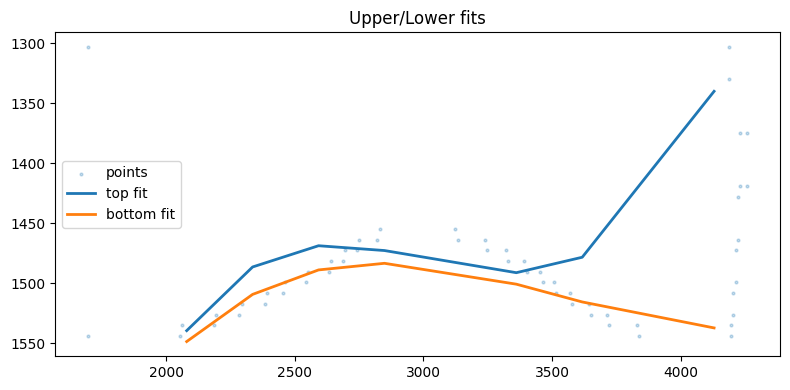

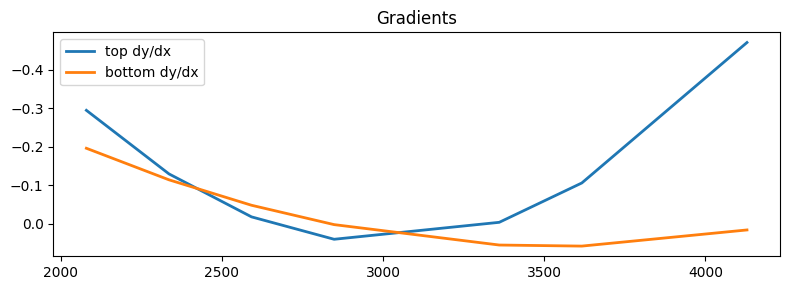

上边缘： {'slope_of_dy': -7.504784106188645e-05, 'flatness': '不太平', 'tilt': '整体右上倾', 'bend': '整体凸（向下开口）'}
下边缘： {'slope_of_dy': 0.00010658698347976739, 'flatness': '不太平', 'tilt': '整体右下倾', 'bend': '整体凸（向下开口）'}


KeyError: 'top_summary'

In [69]:
coord = np.array(coord).reshape(-1, 2)  # from (1,230,2) -> (230,2)
coord = coord[np.argsort(coord[:,0])]

res = fit_two_edges(coord, bins=10, deg=3)

print("Top:", res["top_summary"])
print("Bottom:", res["bot_summary"])
